In [3]:
# download the file 'problem_set_1_data.csv'
# and the execute this cell

import pandas as pd
data = pd.read_csv('problem_set_1_data.csv')
data

,group,outcome,x1,x2
0,1,True,14.510771,19.431799
1,0,False,11.404356,3.332700
2,1,False,10.526163,4.323102
3,1,True,10.841790,21.453620
4,0,False,-1.902080,-10.871900
...,...,...,...,...
19995,1,False,8.816086,10.895516
19996,1,False,10.790022,4.843957
19997,0,False,12.043766,5.087219
19998,1,True,22.548743,17.227402


For this problem we’ll use the toy dataset ``problem_set_1_data.csv`. Each row represents a person belonging to one of two demographic groups, denoted by the binary group variable. The task is to predict the binary out­come variable using the continuous features $x_1$ and $x_2$, and possibly also using group.

Given a classifier $f$ and a dataset $D$, let’s define the demographic disparity of the classifier as the absolute difference in the probability of positive classification for the two groups:

$$ |P(\hat Y = 1|X\in G^+) - P(\hat Y = 1|X\in G^-)|$$

Disparity varies from 0 to 1. If it is 0, we say that the classifier satisfies demographic parity.

**Notes and hints**:
+ Partition the data into training and validation sets, and report all accuracies and disparities on the validation set. You might want to use k-fold cross validation.
+ Report any regularization parameter that you used for logistic regression.
+ The choice of ML library, etc. is up to you.


1. Train a logistic regression classifier to predict outcome given $x_1$ and $x_2$. Report its accuracy and demographic disparity. Accuracy refers to the fraction of instances classified correctly.

In [ ]:
# your code here

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [55]:
X = data[['x1', 'x2']]
y = data['outcome']
group = data['group']

#Training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# Train logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
coefs = classifier.coef_
b = classifier.intercept_
print("x1,x2 values :",coefs,"b value :", b)


y_pred = classifier.predict(X_val)
cv_scores = cross_val_score(classifier, X, y, cv=5, scoring='accuracy')

# Report cross-validated accuracy
print("Cross-validated Accuracy:", cv_scores.mean())

#Accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

group1 = classifier.predict_proba(X_val[group == 1])[:, 1].mean()
group0 = classifier.predict_proba(X_val[group == 0])[:, 1].mean()
disparity = abs(group1 - group0)

#Disparity
print("Demographic Disparity:", disparity)
#Report any regularization parameter used
print("Regularization Parameter: C = ", classifier.get_params()['C'])


x1,x2 values : [[0.13852221 0.12764138]] b value : [-2.66746413]
Cross-validated Accuracy: 0.73555
Accuracy: 0.725
Demographic Disparity: 0.11672292290956343
Regularization Parameter: C =  1.0


/var/folders/j7/xflr_28d3fdfj9bfhf78d91h0000gn/T/ipykernel_1072/3155464865.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group1 = classifier.predict_proba(X_val[group == 1])[:, 1].mean()
/var/folders/j7/xflr_28d3fdfj9bfhf78d91h0000gn/T/ipykernel_1072/3155464865.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group0 = classifier.predict_proba(X_val[group == 0])[:, 1].mean()


2. One of the features $x_1$ and $_2$ is a proxy for group membership (i.e., it correlates with group). Which feature is it? Train a classifier without that feature (i.e., using only a single feature). Report the accuracy and demographic disparity.

In [ ]:
# your code here

In [32]:
# Identify which feature is a proxy for group membership
correlation_x1 = data['x1'].corr(data['group'])
correlation_x2 = data['x2'].corr(data['group'])
print(correlation_x1, correlation_x2)

if abs(correlation_x1) > abs(correlation_x2):
    proxy_feature = 'x1'
else:
    proxy_feature = 'x2'

print("Proxy feature for group membership:", proxy_feature)

X = data.drop(columns=['outcome', proxy_feature, 'group'])
y = data['outcome']
group = data['group'] 

#Training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression classifier without the proxy feature
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy without proxy feature:", accuracy)
coefs = classifier.coef_
b = classifier.intercept_
print("x1,x2 values :",coefs,"b value :", b)

#Disparity
group1 = classifier.predict_proba(X_val[group == 1])[:, 1].mean()
group0 = classifier.predict_proba(X_val[group == 0])[:, 1].mean()
disparity = abs(group1 -group0)

print("Demographic Disparity without proxy feature:", disparity)

#Report any regularization parameter used
print("Regularization Parameter:", classifier.get_params()['C'])

0.3408641915566749 0.0090209191659738
Proxy feature for group membership: x1
Accuracy without proxy feature: 0.68475
x1,x2 values : [[0.1708996]] b value : [-1.70819881]
Demographic Disparity without proxy feature: 0.0019446494895081212
Regularization Parameter: 1.0


/var/folders/j7/xflr_28d3fdfj9bfhf78d91h0000gn/T/ipykernel_1072/1189787453.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group1 = classifier.predict_proba(X_val[group == 1])[:, 1].mean()
/var/folders/j7/xflr_28d3fdfj9bfhf78d91h0000gn/T/ipykernel_1072/1189787453.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group0 = classifier.predict_proba(X_val[group == 0])[:, 1].mean()


3. Suppose we wish to achieve a tunable tradeoff between accuracy and demographic disparity. One way to do this is to add a term to the loss function that measures the disparity of $f$. Write a formula for such a loss function term and explain it.

**Notes and hints**:
The training set disparity is a good start, but it is tough to optimize because it has discontinuities when a training point falls on the decision boundary. Can you come up with a continuous analog of the training set disparity?

Let us denote the probability of positive classification for group $G_{+}$ as $P(\hat Y = 1|X\in G_{+})$ and for group $G_{-}$ as $P(\hat Y = 1|X\in G_{-})$. In order to make continous and differentiable the demographic disparity we will consider the squared disparity term:

$(P(\hat Y = 1|X\in G_{+}) - P(\hat Y = 1|X\in G_{-}))^2$

We will implement this in the loss function in the following way:

**ANSWER:** $Loss = Loss_{standard} + \lambda* Loss_{disparity} $

Where:

1) $Loss_{standard}$ is the standard loss for the logistic regression (binay cross entropy)

2) $Loss_{disparity} = (  \frac{1}{|G_{+}|}\sum_{x_i\in G_{+}} \sigma(z_i) - \frac{1}{|G_{-}|}\sum_{x_i\in G_{-}} \sigma(z_i) ) ^2   $

where $\sigma$ is the sigmoid function applied to the linear combination of the input features $x_i$, weigths $w$ and the bias $b$. That is, $z_i = w^T*x_i + b.$  

3) $\lambda$ is the tuning parameter that will control the trade-off between accuracy and demographic disparity.



4. Train a model with this loss function.  Gradually vary the strength of this disparity term in the loss function and optimize the resulting loss function each time. Use this to plot a curve showing the achievable tradeoff between accuracy (on the $y$-axis) and disparity (on the $x$-axis).

**Notes and hints**:
When the disparity strength is 0, you should recover the accuracy that you reported for part (1).




In [ ]:
# your code here

Let us create a class to implement this new loss function

In [1]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class CustomLogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, loss_function='log', lambda_=1.0, learning_rate=1, max_iter=3000, tol=1e-6):
        self.loss_function = loss_function
        self.lambda_ = lambda_
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def loss(self, theta, X, y, group,b):
        z = np.dot(X, theta) + self.b
        h = self.sigmoid(z)
        eps = 1e-10

        if self.loss_function == 'log':
            loss_value = -np.mean(y * np.log(h+eps) + (1 - y) * np.log(1 - h+eps))
        else:
            raise ValueError("Unknown loss function")

        # Calculate demographic disparity regularization term
        group_indices = (group == 1), (group == 0)
        disparity = (np.mean(h[group_indices[0]]) - np.mean(h[group_indices[1]]))

        return loss_value + self.lambda_ * (disparity ** 2)

    def gradient(self, theta, X, y, group,b):
        z = np.dot(X, theta) + self.b
        h = self.sigmoid(z)

        gradient = np.dot(X.T, (h - y)) / len(y)

        # Calculate demographic disparity regularization term gradient
        group_indices = (group == 1), (group == 0)
        mean_prob_group1 = np.mean(h[group_indices[0]])
        mean_prob_group0 = np.mean(h[group_indices[1]])

        disparity = mean_prob_group1 - mean_prob_group0
        grad_reg_term_group1 = np.dot(X[group_indices[0]].T, h[group_indices[0]] * (1 - h[group_indices[0]]))/ len(h[group_indices[0]])
        grad_reg_term_group0 = np.dot(X[group_indices[1]].T, h[group_indices[1]] * (1 - h[group_indices[1]]))/ len(h[group_indices[1]])
        gradient_reg = 2 * disparity * (grad_reg_term_group1 - grad_reg_term_group0)
        gradient += self.lambda_ * gradient_reg

        gradient_b = np.mean(h - y) # Gradient with respect to bias term
        gradient_reg_b = 2 * disparity * (np.mean(h[group_indices[0]] * (1 - h[group_indices[0]])) - np.mean(h[group_indices[1]] * (1 - h[group_indices[1]])))
        gradient_b += self.lambda_ * gradient_reg_b

        return gradient, gradient_b

    def fit(self, X, y, group,b):
        n_samples, n_features = X.shape
        self.theta = np.zeros(n_features)
        self.b = 0
        it = 0
        tol_lr = 1e-9
        gradient = gradient_b = 1 #to enter the while


        while((np.linalg.norm(gradient) >= self.tol) and (np.linalg.norm(gradient_b) >= self.tol)):
            it +=1


            gradient, gradient_b = self.gradient(self.theta, X, y, group,self.b)

            while( self.loss(self.theta-self.learning_rate*gradient ,  X, y, group,self.b - self.learning_rate*gradient_b) >= self.loss(self.theta,  X, y, group,self.b)):
              self.learning_rate /=2
              print(self.learning_rate, it)
              if(self.learning_rate <= tol_lr):
                break

            if(self.learning_rate <= tol_lr):
              break
            if (it % 1000 == 0):
                print(it)


            self.theta -= self.learning_rate * gradient  # Update weights
            self.b -= self.learning_rate * gradient_b  # Update bias term

        print(self.theta, self.b)



    def predict_proba(self, X):
        z = np.dot(X, self.theta) + self.b
        return self.sigmoid(z)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)


0.5 1
0.25 1
0.125 1
0.0625 1
0.03125 1
1000
2000
3000
4000
5000
6000
7000
8000
9000
[0.13850076 0.127611  ] -2.666839896667508
Lambda: 0.0, Accuracy: 0.725, Disparity: 0.11671607392790573
0.5 1
0.25 1
0.125 1
0.0625 1
0.03125 1
1000
2000
3000
4000
5000
6000
7000
8000
9000
[0.1373442  0.12816623] -2.660763730294607
Lambda: 0.04000000000000001, Accuracy: 0.725, Disparity: 0.11590558771248921
0.5 1
0.25 1
0.125 1
0.0625 1
0.03125 1
1000
2000
3000
4000
5000
6000
7000
8000
9000
[0.13393766 0.12977995] -2.6426540337694036
Lambda: 0.16000000000000003, Accuracy: 0.72575, Disparity: 0.11350485094894164
0.5 1
0.25 1
0.125 1
0.0625 1
0.03125 1
1000
2000
3000
4000
5000
6000
7000
8000
9000
[0.12847293 0.13230065] -2.6129339888754703
Lambda: 0.3600000000000001, Accuracy: 0.72725, Disparity: 0.10961128184913377
0.5 1
0.25 1
0.125 1
0.0625 1
0.03125 1
1000
2000
3000
4000
5000
6000
7000
8000
9000
[0.1212717  0.13549301] -2.57249620120463
Lambda: 0.6400000000000001, Accuracy: 0.726, Disparity: 0.104400

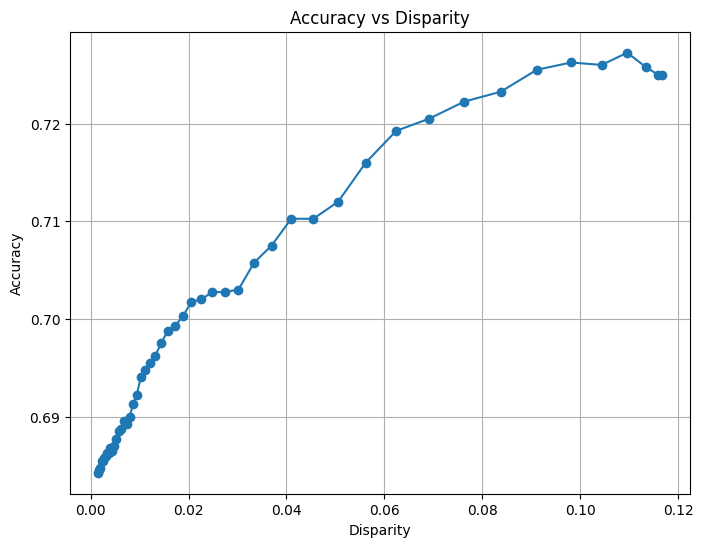

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = data[['x1', 'x2']].values
y = data['outcome'].values
group = data['group'].values

X_train, X_val, y_train, y_val, group_train, group_test = train_test_split(X, y, group, test_size=0.2, random_state=42)

lambda_values =  [(0.2*x)**2  for x in range(0, 50, 1)]

accuracy_values_ex4 = []
disparity_values_ex4 = []
coefs_ex4 = []

for lambda_ in lambda_values:
    model = CustomLogisticRegression(lambda_=lambda_, learning_rate=1, max_iter=10000, tol=1e-6)
    model.fit(X_train, y_train, group_train, b = 0)

    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_values_ex4.append(accuracy)

    coefs_ex4.append(model.theta)

    group_pred_proba = model.predict_proba(X_val)
    group_disparity = np.abs(np.mean(group_pred_proba[group_test == 1]) - np.mean(group_pred_proba[group_test == 0]))
    disparity_values_ex4.append(group_disparity)
    group_pred = model.predict(X_val)

    print(f"Lambda: {lambda_}, Accuracy: {accuracy}, Disparity: {group_disparity}")

#Plot
plt.figure(figsize=(8, 6))
plt.plot(disparity_values_ex4, accuracy_values_ex4, marker='o', linestyle='-')
plt.title('Accuracy vs Disparity')
plt.xlabel('Disparity')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

We are going to plot two different graphs that will be useful for exercise 6.

In [16]:
x1 =  [arr[0] for arr in coefs_ex4]
x2 = [arr[1] for arr in coefs_ex4]

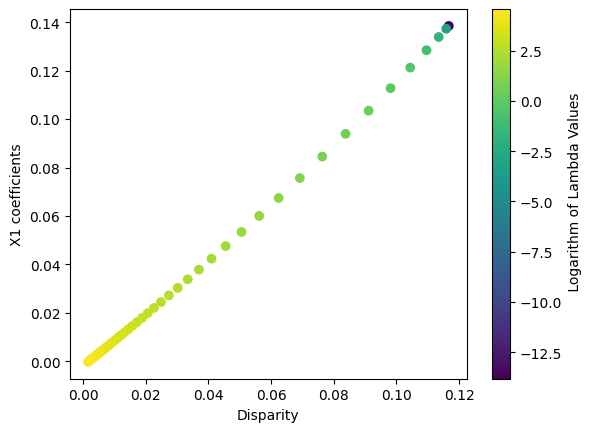

In [53]:
plt.scatter(disparity_values_ex4, x1,  c=np.log(lambda_values), cmap='viridis')
plt.xlabel("Disparity")
plt.ylabel("X1 coefficients")
plt.colorbar(label=' Logarithm of Lambda Values')  
plt.show()

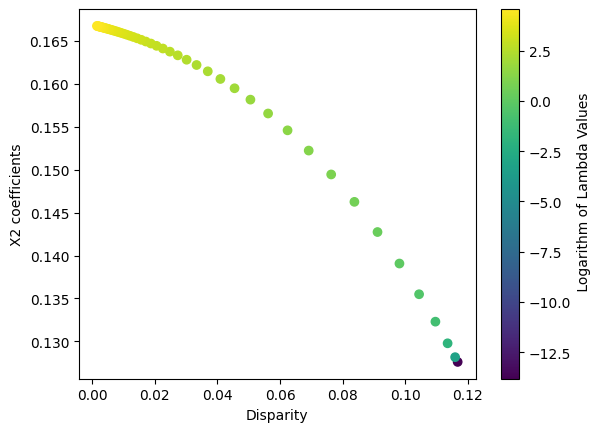

In [54]:
plt.scatter(disparity_values_ex4, x2,  c=np.log(lambda_values), cmap='viridis')
plt.xlabel("Disparity")
plt.ylabel("X2 coefficients")
plt.colorbar(label=' Logarithm of Lambda Values')  
plt.show()

5. Repeat part (4), but with group as an additional feature (i.e., train a classifier to predict outcome based on $x_1$, $x_2$, and $group$, using the modified loss function).


In [ ]:
# your code here

0.5 1
0.25 1
0.125 1
0.0625 1
0.03125 1
1000
2000
3000
4000
5000
6000
7000
[ 0.14023876  0.12638063 -0.06804084] -2.6367163139113763
Lambda: 0.0, Accuracy: 0.72675, Disparity: 0.10648828021202833
0.5 1
0.25 1
0.125 1
0.0625 1
0.03125 1
1000
2000
3000
4000
5000
6000
7000
[ 0.14020922  0.12634313 -0.10282818] -2.618444062914391
Lambda: 0.04000000000000001, Accuracy: 0.72575, Disparity: 0.1005763654244749
0.5 1
0.25 1
0.125 1
0.0625 1
0.03125 1
1000
2000
3000
4000
5000
6000
[ 0.14004467  0.12615747 -0.18862641] -2.5714252413702785
Lambda: 0.16000000000000003, Accuracy: 0.72775, Disparity: 0.08591561994800584
0.5 1
0.25 1
0.125 1
0.0625 1
0.03125 1
1000
2000
3000
4000
5000
[ 0.13964464  0.12571444 -0.28971713] -2.5113496059719465
Lambda: 0.3600000000000001, Accuracy: 0.7265, Disparity: 0.06845537851084149
0.5 1
0.25 1
0.125 1
0.0625 1
0.03125 1
1000
2000
3000
4000
[ 0.13895322  0.12491278 -0.38128119] -2.4486331416166167
Lambda: 0.6400000000000001, Accuracy: 0.72525, Disparity: 0.052349670

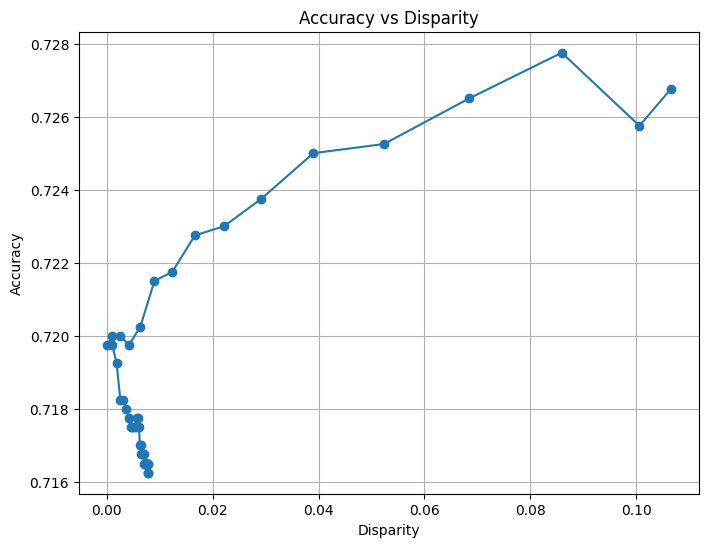

In [11]:
X = data[['x1', 'x2', 'group']].values
y = data['outcome'].values
group = data['group'].values

X_train, X_val, y_train, y_val, group_train, group_test = train_test_split(X, y, group, test_size=0.2, random_state=42)

lambda_values =  [(0.2*x)**2  for x in range(0, 50, 1)]
accuracy_values_ex5 = []
disparity_values_ex5 = []
coefs_ex5 = []

for lambda_ in lambda_values:
    model = CustomLogisticRegression(lambda_=lambda_, learning_rate=1, max_iter=3000, tol=1e-4)
    model.fit(X_train, y_train, group_train, b= 0)

    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_values_ex5.append(accuracy)

    coefs_ex5.append(model.theta)

    group_pred_proba = model.predict_proba(X_val)
    group_disparity = np.abs(np.mean(group_pred_proba[group_test == 1]) - np.mean(group_pred_proba[group_test == 0]))
    disparity_values_ex5.append(group_disparity)

    print(f"Lambda: {lambda_}, Accuracy: {accuracy}, Disparity: {group_disparity}")

#Plot
plt.figure(figsize=(8, 6))
plt.plot(disparity_values_ex5, accuracy_values_ex5, marker='o', linestyle='-')
plt.title('Accuracy vs Disparity')
plt.xlabel('Disparity')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Again, let us plot three different graphs that will be useful for exercise 6.

In [12]:
x1_ex5 =  [arr[0] for arr in coefs_ex5]
x2_ex5 = [arr[1] for arr in coefs_ex5]
groups_ex5 = [arr[2] for arr in coefs_ex5]

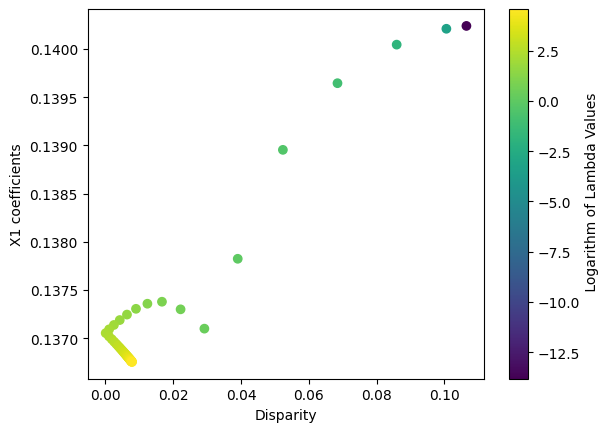

In [50]:
plt.scatter(disparity_values_ex5, x1_ex5, c=np.log(lambda_values), cmap='viridis')
plt.xlabel("Disparity")
plt.ylabel("X1 coefficients")
plt.colorbar(label=' Logarithm of Lambda Values')  
plt.show()

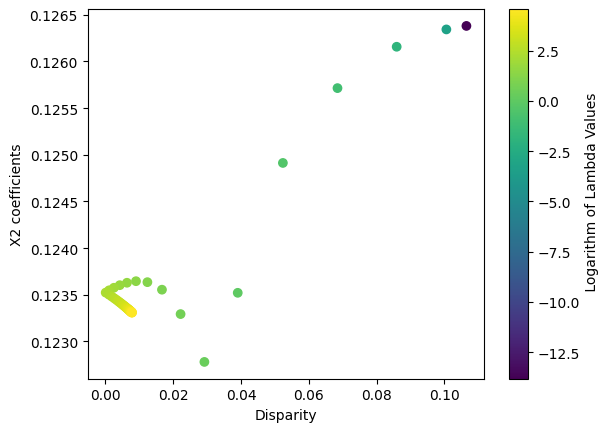

In [49]:
plt.scatter(disparity_values_ex5 ,x2_ex5, c=np.log(lambda_values), cmap='viridis')
plt.xlabel("Disparity")
plt.ylabel("X2 coefficients")
plt.colorbar(label=' Logarithm of Lambda Values')  
plt.show()

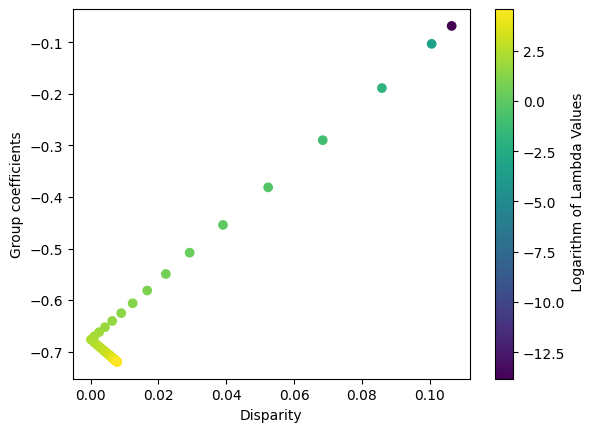

In [48]:
plt.scatter(disparity_values_ex5, groups_ex5, c=np.log(lambda_values), cmap='viridis')
plt.xlabel("Disparity")
plt.ylabel("Group coefficients")
plt.colorbar(label=' Logarithm of Lambda Values') 
plt.show()

6.  In parts (4) and (5), how do the coefficients of $x_1$, $x_2$, and $group$ change as the strength of the disparity term in the loss function increases? Give an intuitive explanation for why the coefficients change the way they do.


This answer is based in the previous plots. Let us start talking about exercise 4.

We can see how the lower the demographic disparity is, the more the $x_1$ coefficent tend to zero. Contrary, the lower the demographic disparity is the higher the value of $x_2$ coefficient is. 

In exercise 5, where  we added the variable group, we have a different scenario. In this case, both $x_1$ and $x_2$ when the demographic disparity is lower tend to have a similar value, around $0,12$ and $0,14$. When the disparity gets higher they both increase its values. Finally, we can see how the coefficient of the group variable has a negative value and its larger (but negative) when the disparity is lower and increases a bit (up to $-0,1$) when the disparity is higher. 

As we have seen before, the variable $x_1$ is is a proxy for group membership. Also, when we deleted this variable in exercise 2 we saw a large decrease in the disparity value. Hence, it makes sense that now when we the values of $x_1$ are lower we get a lower disparity. 

Finally, note that we have also colored the graph based on the lambda values (tuning parameter). As we can see in all cases the lower the lambda value is the larger the disparity is. That makes sense since lambda is the tuning parameter in the loss function, that controls the trade-off between accuracy and demographic disparity

ANSWER:

7. Comparing your accuracy-vs-disparity curves in parts (4) and (5), which option gives a better tradeoff: using $group$ or not using $group$?


As we can see in the accuracy-vs-disparity curves when using the group variable we get slightly better performance in both, accuracy and disparity, when including the group variable. Hence, I would choose this approach.

ANSWER:

8. Describe a decision-making scenario that might have led to this toy problem. Specifically, state what the outcome, $x_1$, $x_2$, and $group$ variables are. In this scenario, describe which classifier (if any) would you use and what factors would you consider in making your choice.


ANSWER:

Let us describe a decision-making scenario that might have let to this toy problem. 

Consider a scenario where a bank is reviewing loan applications. They want to ensure fairness in their lending practices and avoid bias against certain demographic groups. Historically, they've observed a correlation between the applicant's income level and their demographic group due to socio-economic factors. For instance, certain demographic groups might have lower average incomes compared to others.

With this, we can state the variables as: 

Outcome: Loan approval decision (1 for approved, 0 for denied)

Feature variables:

$x_1$: Annual income.

$x_2$: Credit score. The credit score represents a numerical assessment of an individual's creditworthiness based on their credit history. It's commonly used by financial institutions to evaluate the risk associated with lending money to an individual. 

$group$: Demographic group, such as ethnicity or nationality.


Decision and Considerations:

In this scenario, $x_1$ serves as a proxy for the demographic group, meaning it correlates with the demographic variable ($group$). For example, certain demographic groups might have lower average incomes compared to others due to systemic inequalities.

Choice of Classifier: Logistic Regression with the inclusion of the group variable and $x_1$.

Factors to consider: Logistic regression is suitable for binary classification tasks like loan approval decisions. By including both the group variable and $x_1$ in the model, the bank can account for any potential biases or disparities in the lending process based on demographic factors.
